In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\siham\AppData\Local\Temp\ipykernel_12708\1068626296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outcome', data = dataset, palette = 'magma')


<Axes: xlabel='Outcome', ylabel='count'>

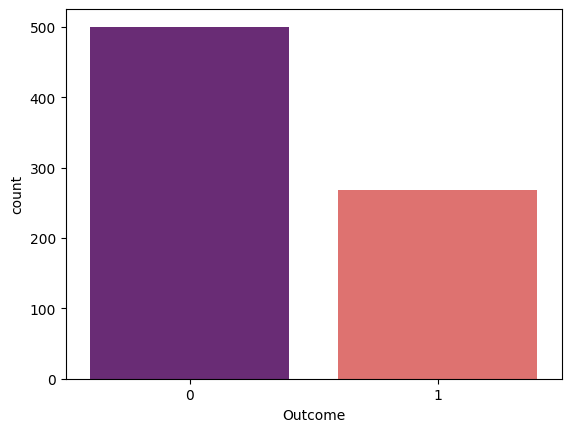

In [7]:
sns.countplot(x = 'Outcome', data = dataset, palette = 'magma', )

<Axes: >

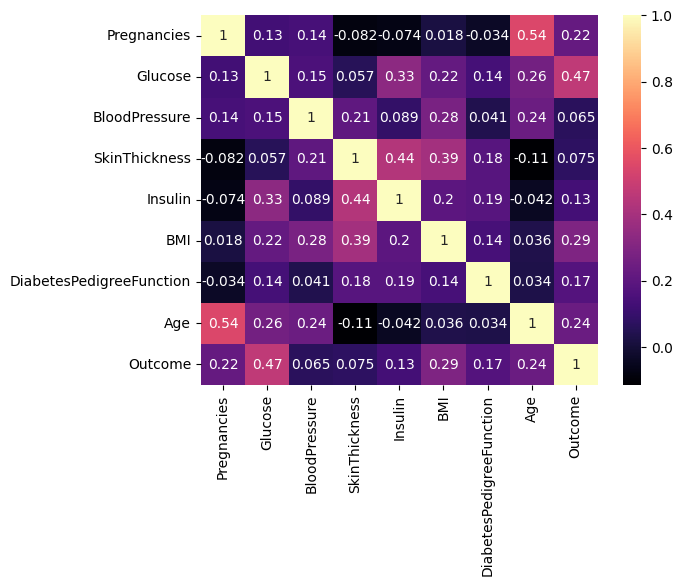

In [8]:
sns.heatmap(dataset.corr(), annot = True, cmap = 'magma')

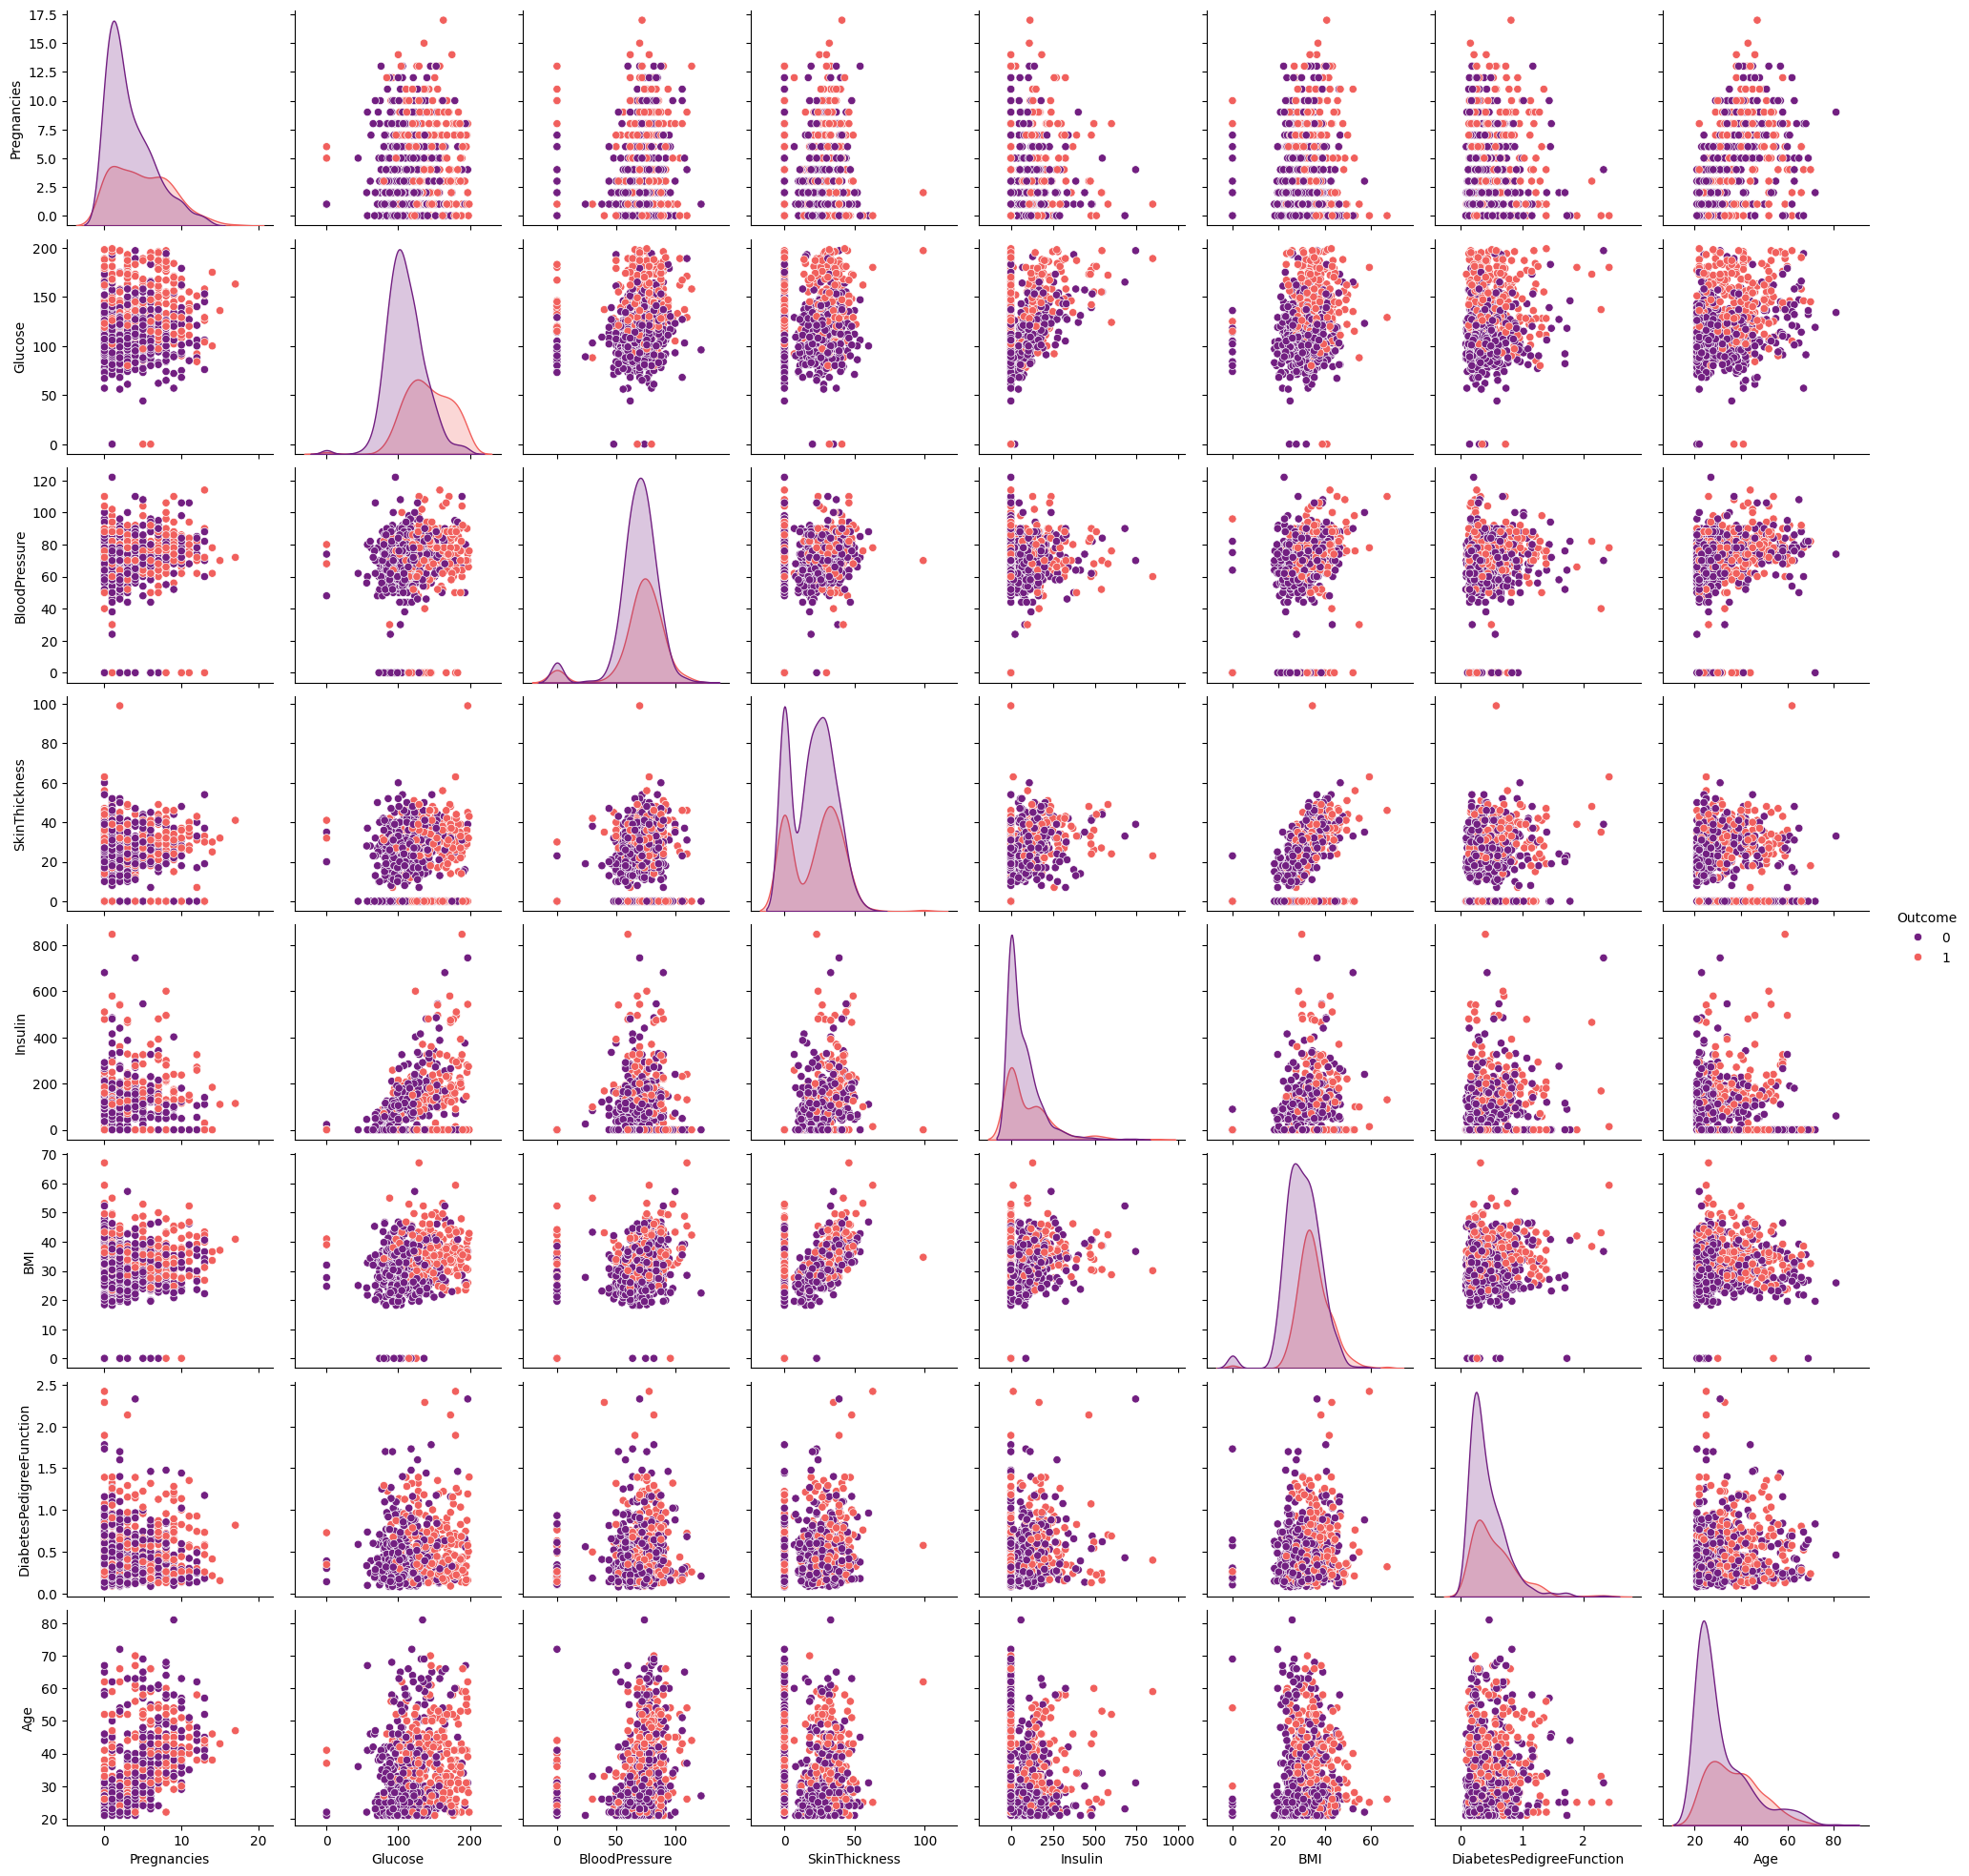

In [9]:
sns.pairplot(dataset, hue = 'Outcome', palette = 'magma')

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

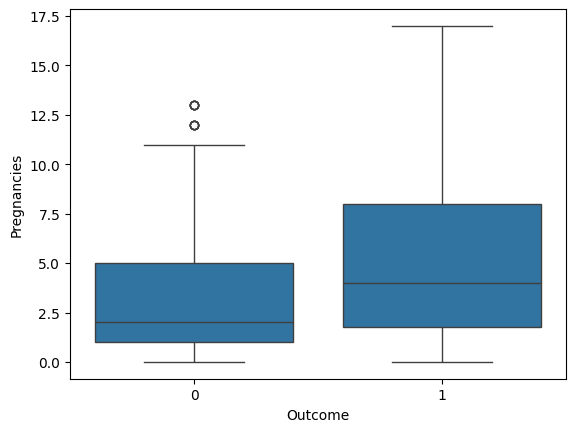

In [14]:
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = dataset[['Outcome', 'Pregnancies']])

<Axes: xlabel='Outcome', ylabel='Age'>

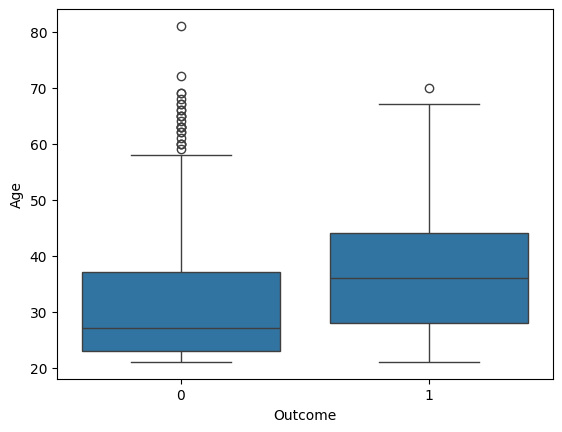

In [20]:
sns.boxplot(x = 'Outcome', y = 'Age', data = dataset[['Age', 'Outcome']])

In [21]:
x = dataset.drop('Outcome', axis = 1)
y = dataset['Outcome']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\siham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.score(x_test, y_test)

0.8246753246753247

In [26]:
y_pred = model.predict(x_test)

In [27]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.8246753246753247


<Axes: >

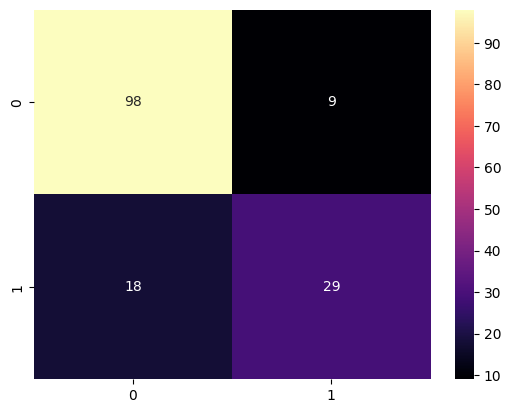

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'magma')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



<Axes: >

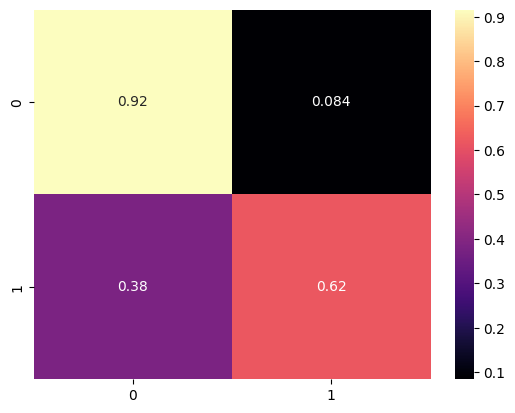

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot = True, cmap = 'magma')

In [44]:
x_test.iloc[0]

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                       0.000
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Name: 661, dtype: float64

In [46]:
model.predict([[1, 34, 74, 30, 10, 33.6, 2, 27]])

c:\Users\siham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)